# Pymaceuticals Inc.

    Analysis
    
In comparison to the other regimens, Capomulin had the second smallest average tumor volume.
The tumor volume of mice treated with Capomulin decreased over time.
The dataset indicates that Capomulin and Ramicane had the most similar results, with both performing better than the placebo group.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# data source 
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset using the merge function
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Get the number of unique mice in the dataset
num_mice = merged_data["Mouse ID"].nunique()

print(f"There are {num_mice} unique mice in the dataset.")


There are 249 unique mice in the dataset.


In [23]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

print(f"The following mice have duplicate entries: {duplicate_mice}")


The following mice have duplicate entries: ['g989']


In [28]:
# Drop the duplicate mouse by its ID to create a clean DataFrame
clean_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

# Create a new DataFrame to display the cleaned data
clean_df = pd.DataFrame(clean_data)

# Print it out
print("The cleaned dataset without duplicate mice:")
print(clean_df.to_string(index=False))


The cleaned dataset without duplicate mice:
Mouse ID Drug Regimen    Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
    k403     Ramicane   Male          21          16          0           45.000000                 0
    k403     Ramicane   Male          21          16          5           38.825898                 0
    k403     Ramicane   Male          21          16         10           35.014271                 1
    k403     Ramicane   Male          21          16         15           34.223992                 1
    k403     Ramicane   Male          21          16         20           32.997729                 1
    k403     Ramicane   Male          21          16         25           33.464577                 1
    k403     Ramicane   Male          21          16         30           31.099498                 1
    k403     Ramicane   Male          21          16         35           26.546993                 1
    k403     Ramicane   Male          

In [29]:
# Count the number of mice in the clean DataFrame
num_mice = len(clean_data["Mouse ID"].unique())

# Print the number of mice
print("Number of mice in the clean DataFrame:", num_mice)


Number of mice in the clean DataFrame: 249


# Summary Statistics

In [35]:
# Group the clean_data DataFrame by Drug Regimen and calculate the summary statistics
summary_stats = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

# Flatten the summary statistics column names
summary_stats.columns = [f"{x[0]}_{x[1]}" for x in summary_stats.columns]

# Reset the index to make the Drug Regimen column into a regular column
summary_stats = summary_stats.reset_index()

# Display the summary statistics table as a DataFrame
display(summary_stats)


,Drug Regimen,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_var,Tumor Volume (mm3)_std,Tumor Volume (mm3)_sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [34]:
# Generate the summary statistics table for tumor volume by drug regimen
summary_df = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns of the summary statistics table
summary_df.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Display the summary statistics table as a DataFrame
display(summary_df)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and pie charts

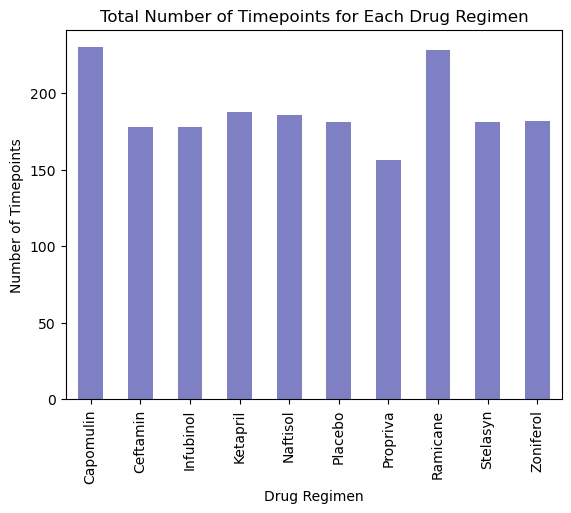

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group the clean_data DataFrame by Drug Regimen and count the number of timepoints
timepoint_counts = clean_data.groupby("Drug Regimen")["Timepoint"].count()

# Create a bar plot of the timepoint counts using Pandas
timepoint_counts.plot(kind="bar", color="darkblue", alpha=0.5, align="center")

# Set the title and axis labels
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

# Display the plot
plt.show()


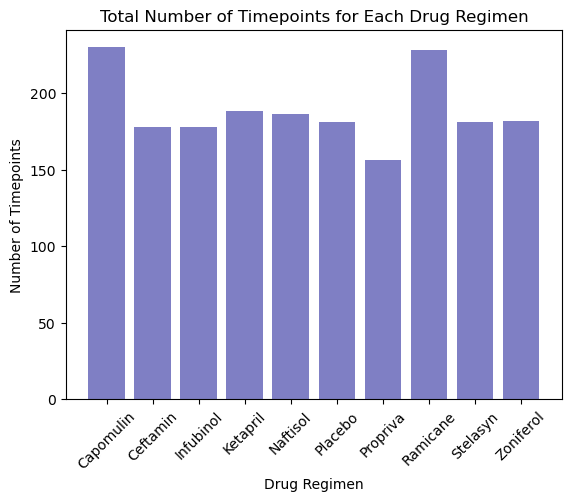

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Group the clean_data DataFrame by Drug Regimen and count the number of timepoints
timepoint_counts = clean_data.groupby("Drug Regimen")["Timepoint"].count()

# Create a bar plot of the timepoint counts using pyplot
plt.bar(timepoint_counts.index, timepoint_counts.values, color="darkblue", alpha=0.5, align="center")

# Set the title and axis labels
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()



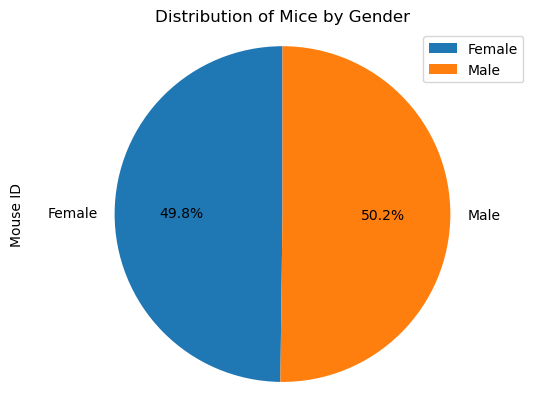

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by sex
gender_data = clean_data.groupby("Sex")

# Count the number of mice by sex
gender_count = gender_data["Mouse ID"].nunique()

# Create a pie plot using Pandas
gender_count.plot(kind="pie", autopct="%1.1f%%", startangle=90, title="Distribution of Mice by Gender")

# Add a legend
plt.legend(labels=["Female", "Male"])
plt.axis("equal")

# Show the plot
plt.show()


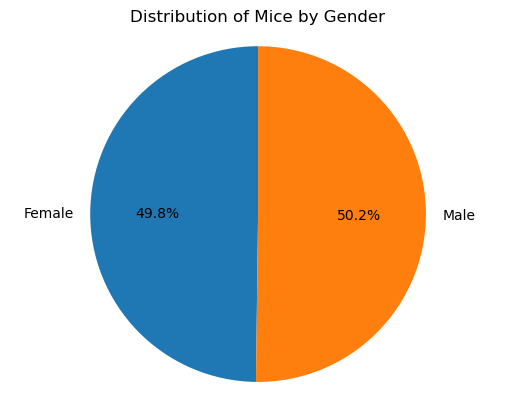

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the data by sex
gender_data = clean_data.groupby("Sex")

# Count the number of mice by sex
gender_count = gender_data["Mouse ID"].nunique()

# Create a pie plot using pyplot
plt.pie(gender_count, labels=["Female", "Male"], autopct="%1.1f%%", startangle=90)

# Add a title
plt.title("Distribution of Mice by Gender")

# Make the plot circular
plt.axis("equal")

# Show the plot
plt.show()


# QUARTILES OUTLIERS AND BOXPLOTS

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


# Define the list of four treatment regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Get the last (greatest) timepoint for each mouse
last_timepoint = merged_data.groupby("Mouse ID")["Timepoint"].max()

# Create a new DataFrame with the final tumor volume for each mouse
final_tumor_volume = pd.DataFrame(last_timepoint)
final_tumor_volume = pd.merge(final_tumor_volume, merged_data, on=["Mouse ID", "Timepoint"], how="left")

# Filter the DataFrame to only include the four treatment regimens
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatments)]

# Display the final DataFrame as a table
display(final_tumor_volume.head())



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volumes.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    
    # Output results as a table dataframe
    print(f"{treatment} potential outliers: {outliers}")
    summary_stats = {
        "Treatment": treatment,
        "Lower Quartile": lowerq,
        "Median": quartiles[0.5],
        "Upper Quartile": upperq,
        "IQR": iqr,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Number of Potential Outliers": len(outliers)
    }
    summary_stats_df = pd.DataFrame(summary_stats, index=[0])
    display(summary_stats_df)


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Treatment,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound,Number of Potential Outliers
0,Capomulin,32.377357,38.125164,40.15922,7.781863,20.704562,51.832015,0


Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Treatment,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound,Number of Potential Outliers
0,Ramicane,31.56047,36.561652,40.659006,9.098537,17.912664,54.306811,0


Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


,Treatment,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound,Number of Potential Outliers
0,Infubinol,54.048608,60.16518,65.525743,11.477135,36.832905,82.741446,1


Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Treatment,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound,Number of Potential Outliers
0,Ceftamin,48.722078,59.851956,64.29983,15.577752,25.35545,87.666458,0


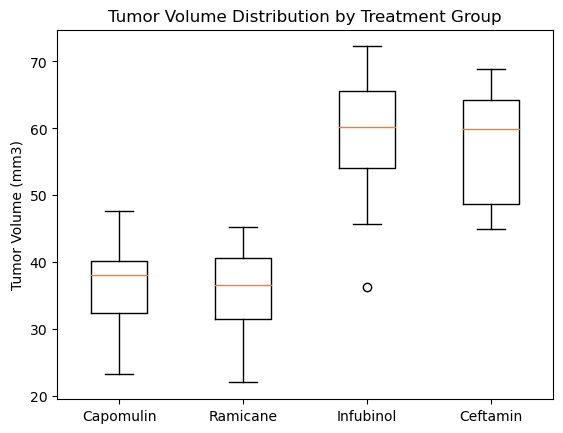

In [46]:
import matplotlib.pyplot as plt

# Create a list of the tumor volume data for each treatment group
tumor_volume_data = [final_tumor_volume[final_tumor_volume["Drug Regimen"] == t]["Tumor Volume (mm3)"] for t in treatments]
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data)

#this are the labels and y,x labels
ax.set_title("Tumor Volume Distribution by Treatment Group")
ax.set_xticklabels(treatments)
ax.set_ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()


# LINES AND SCATTER PLOTS

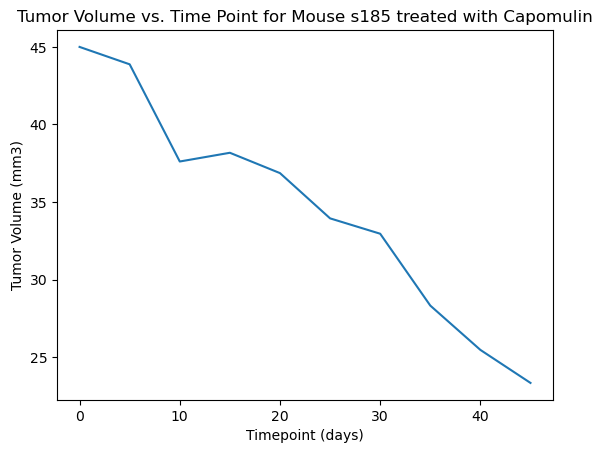

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# First, filter the merged dataset to only include data for mice treated with Capomulin

capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']


mouse_id = 's185'
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

timepoints = single_mouse_data['Timepoint']
volumes = single_mouse_data['Tumor Volume (mm3)']
plt.plot(timepoints, volumes)

# added labels and tittle 
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')

# Display the plot:
plt.show()


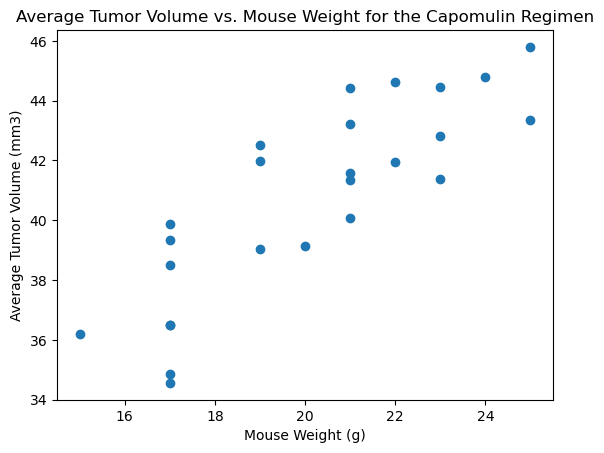

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# First, filter the merged dataset to only include data for mice treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin'] for each mouse
grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
tumor_volumes = grouped_data['Tumor Volume (mm3)']
mouse_weights = grouped_data['Weight (g)']

plt.scatter(mouse_weights, tumor_volumes)

# Added labels
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')

# Display the plot:
plt.show()



# Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


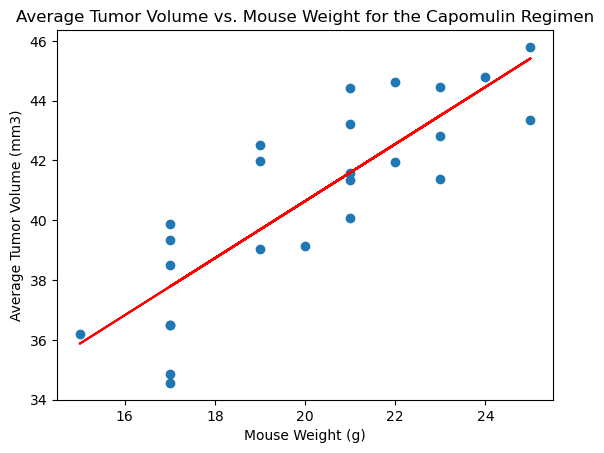

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
for each mouse
grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
tumor_volumes = grouped_data['Tumor Volume (mm3)']
mouse_weights = grouped_data['Weight (g)']

correlation = st.pearsonr(mouse_weights, tumor_volumes)[0]
print(f'The correlation between mouse weight and average tumor volume is {correlation:.2f}')
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weights, tumor_volumes)
plt.scatter(mouse_weights, tumor_volumes)
plt.plot(mouse_weights, slope * mouse_weights + intercept, color='red')

# Add labels and a title to the plot:
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')

# Display the plot:
plt.show()
